In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Q1_Q2_18_combined_data.csv')
df.head(2)

,MarketingHomeStoreid,Store_Type,Age_30th_June,WinbackRateQ2,ChurnRateQ2,Regular_Base_PerQ2,New_Neighbor_AcquisitionQ2,WinBack_RateQ1,Churn_RateQ1,Regular_Base_PerQ1,New_Neighbor_AcquisitionQ1
0,8060,Post,4.369610,0.049380,0.155183,0.286772,575,0.051133,0.126261,0.286024,608
1,8017,Pre,19.071869,0.038337,0.168590,0.230118,689,0.038985,0.135935,0.229750,598


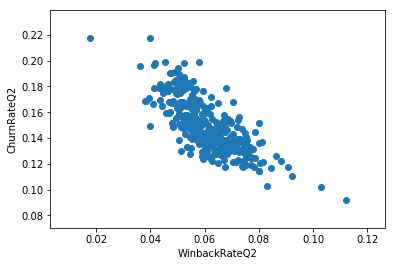

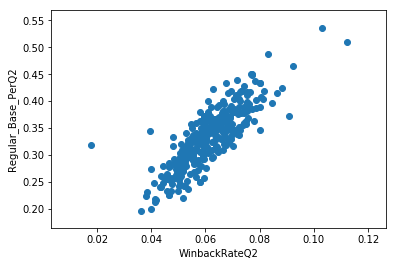

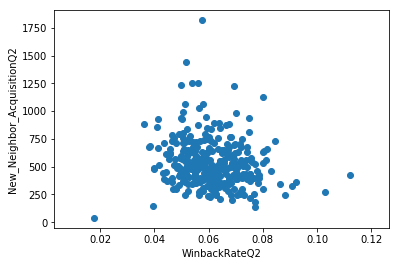

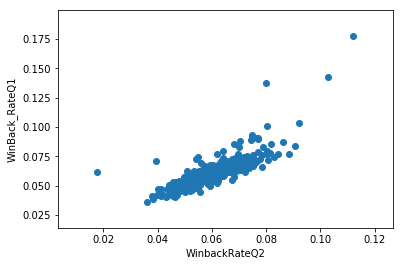

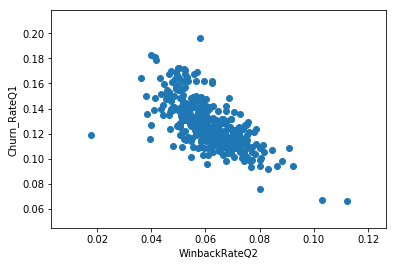

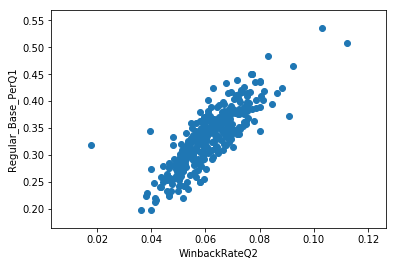

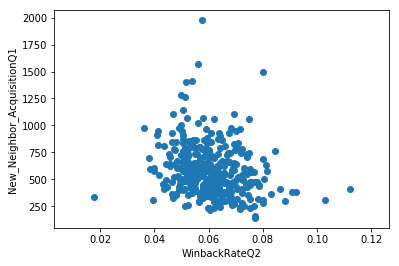

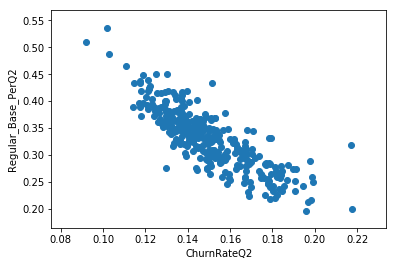

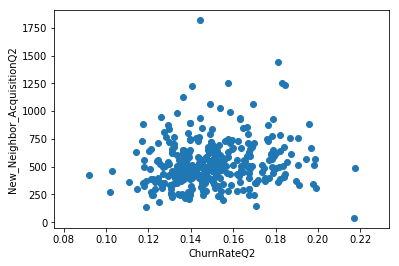

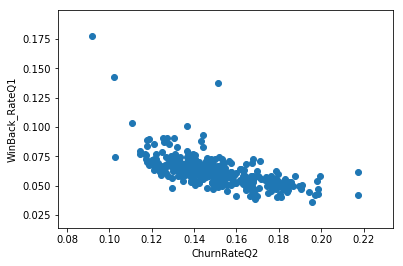

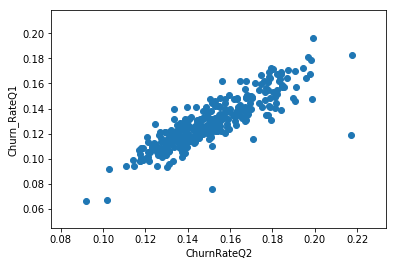

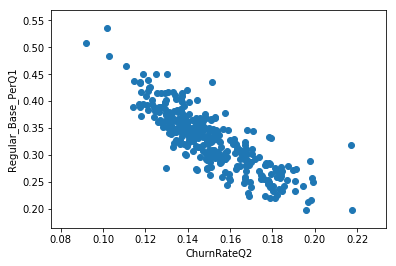

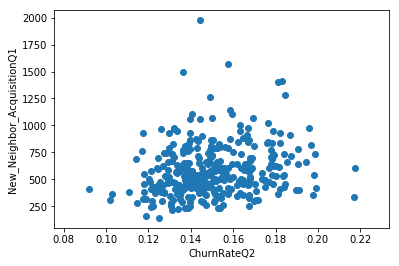

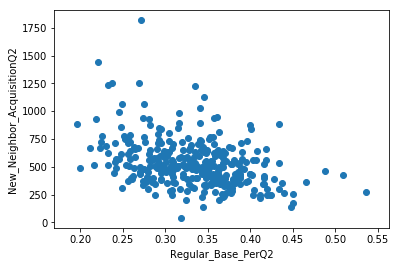

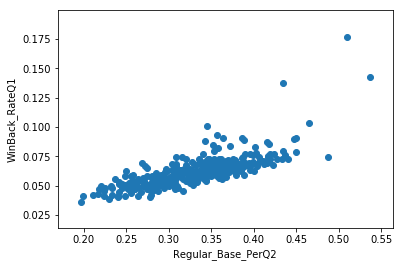

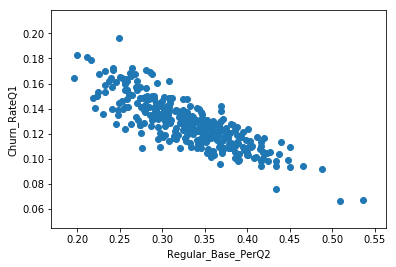

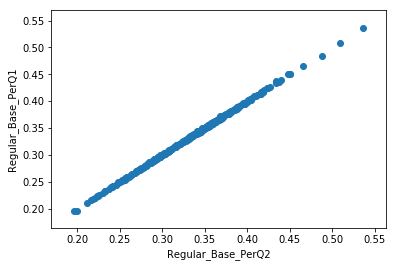

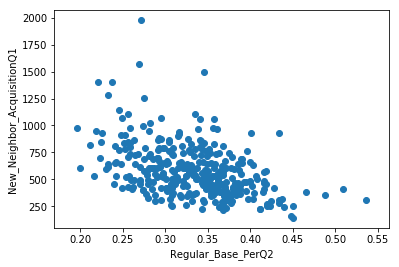

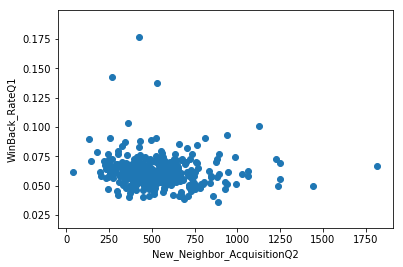

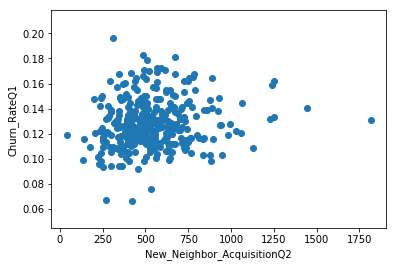

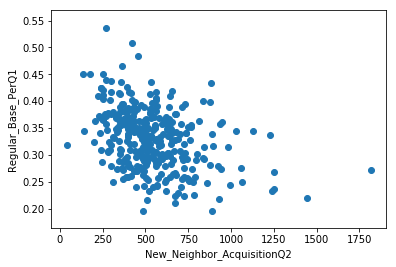

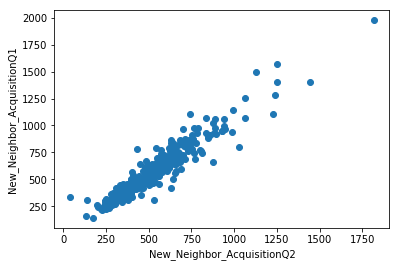

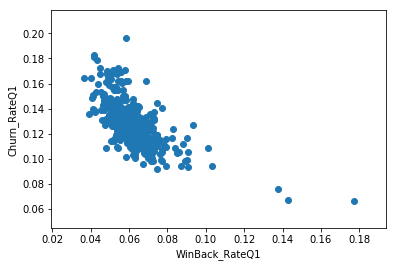

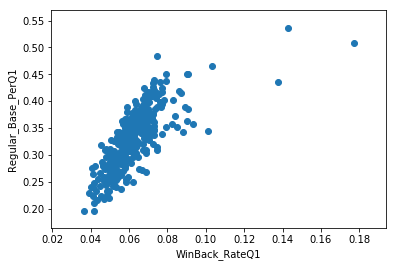

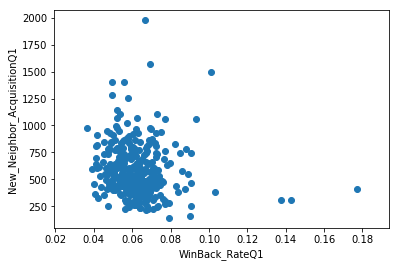

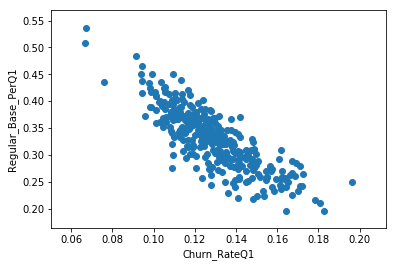

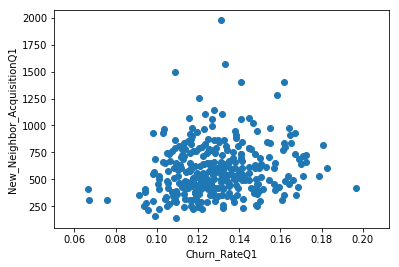

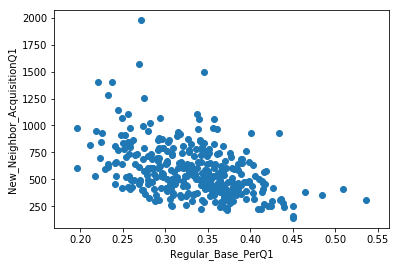

In [3]:
for i in range (3,11):
    for j in range (i+1,11):
        plt.figure()
        plt.scatter(x=df.iloc[:,i], y=df.iloc[:,j], data=df)
        plt.xlabel(list(df)[i])
        plt.ylabel(list(df)[j])

In [4]:
df.columns

Index(['MarketingHomeStoreid', 'Store_Type', 'Age_30th_June', 'WinbackRateQ2',
       'ChurnRateQ2', 'Regular_Base_PerQ2', 'New_Neighbor_AcquisitionQ2',
       'WinBack_RateQ1', 'Churn_RateQ1', 'Regular_Base_PerQ1',
       'New_Neighbor_AcquisitionQ1'],
      dtype='object')

In [5]:
X=np.array(df[['WinbackRateQ2', 'ChurnRateQ2', 'Regular_Base_PerQ2', 'New_Neighbor_AcquisitionQ2','WinBack_RateQ1', 'Churn_RateQ1', 'Regular_Base_PerQ1', 'New_Neighbor_AcquisitionQ1']])

### K-Means Clustering

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans

#### Elbow Curve

Text(0.5, 1.0, 'Elbow Curve')

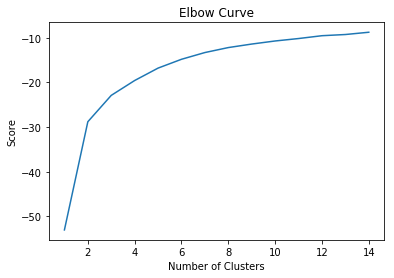

In [8]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

#### Fitting model

In [9]:
k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

In [10]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

In [11]:
#plt.figure(figsize=(10,7))
#ax = plt.axes(projection = '3d')
#ax = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:,2], c=y_kmeans, s=30)

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1, marker='o');
#plt.xlabel('x -->')
#plt.ylabel('y -->')

In [12]:
df['Cluster_Label']=y_kmeans

In [13]:
df.columns

Index(['MarketingHomeStoreid', 'Store_Type', 'Age_30th_June', 'WinbackRateQ2',
       'ChurnRateQ2', 'Regular_Base_PerQ2', 'New_Neighbor_AcquisitionQ2',
       'WinBack_RateQ1', 'Churn_RateQ1', 'Regular_Base_PerQ1',
       'New_Neighbor_AcquisitionQ1', 'Cluster_Label'],
      dtype='object')

### Linear Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [51]:
x=X_scaled
y=df['Cluster_Label'].values

In [52]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(x, y)

In [53]:
data=pd.DataFrame(X_lda)
data['Cluster_Label']=y
data.columns=["LD1","LD2","Cluster_Label"]
data.head()

,LD1,LD2,Cluster_Label
0,1.427408,0.230632,2
1,3.386368,-0.012162,2
2,3.489832,-0.921727,2
3,-0.537182,0.603007,0
4,1.416829,1.009303,2


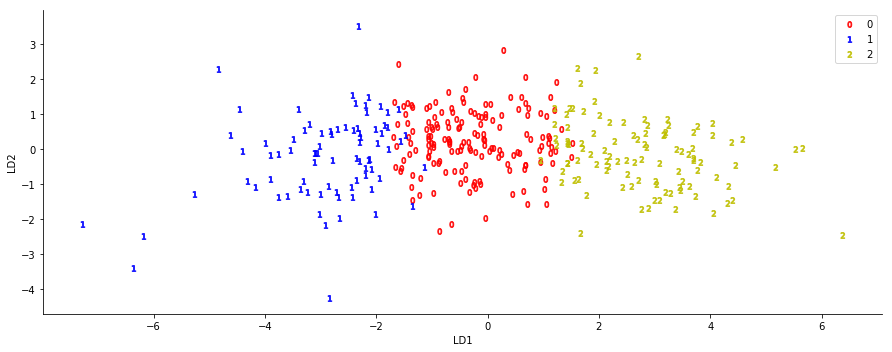

In [54]:
markers = ['$0$','$1$','$2$']
colors = ['r', 'b','y']
sns.lmplot(x="LD1", y="LD2", data=data, hue='Cluster_Label', markers=markers, fit_reg=False, legend=False, 
           palette=colors, aspect=2.5)
plt.legend(loc='best')
plt.show()

In [55]:
cols='WinbackRateQ2','ChurnRateQ2','Regular_Base_PerQ2','New_Neighbor_AcquisitionQ2','WinBack_RateQ1','Churn_RateQ1','Regular_Base_PerQ1','New_Neighbor_AcquisitionQ1'
pd.DataFrame(lda.coef_, columns=cols)

,WinbackRateQ2,ChurnRateQ2,Regular_Base_PerQ2,New_Neighbor_AcquisitionQ2,WinBack_RateQ1,Churn_RateQ1,Regular_Base_PerQ1,New_Neighbor_AcquisitionQ1
0,0.648592,-2.283692,-48.547309,-2.795496,-1.831275,-1.067354,49.969790,1.971798
1,15.094304,-5.941466,9.276878,5.095518,-9.992769,-8.395193,13.972510,-7.896554
2,-12.983356,8.323841,69.558605,0.392455,10.816094,8.340516,-90.227398,3.131056


In [44]:
df['LD1']=X_lda[:,0]
df['LD2']=X_lda[:,1]
corr=df.drop(['MarketingHomeStoreid','Age_30th_June'], axis=1).corr()
corr.iloc[[-2,-1],:]

,WinbackRateQ2,ChurnRateQ2,Regular_Base_PerQ2,New_Neighbor_AcquisitionQ2,WinBack_RateQ1,Churn_RateQ1,Regular_Base_PerQ1,New_Neighbor_AcquisitionQ1,Cluster_Label,LD1,LD2
LD1,-0.858108,0.909361,-0.977550,0.347097,-0.699011,0.877963,-0.978055,0.418272,0.483955,1.000000e+00,8.273151e-16
LD2,-0.242135,-0.217568,-0.102063,-0.094789,-0.277119,-0.134036,-0.092819,0.040483,-0.174147,8.273151e-16,1.000000e+00


In [57]:
lda.scalings_

array([[  -4.89740996,   -3.44929529],
       [   2.60416696,   -6.92008254],
       [  13.31270437, -201.86684461],
       [  -0.64799598,  -13.4662796 ],
       [   3.7097028 ,   -3.43757252],
       [   2.95950062,   -0.96525098],
       [ -20.99728609,  198.28215596],
       [   1.79135548,   11.23605478]])

In [61]:
lda.explained_variance_ratio_

array([0.9898372, 0.0101628])

In [62]:
lda.coef_

array([[  0.64859162,  -2.2836915 , -48.54730867,  -2.79549596,
         -1.83127496,  -1.06735409,  49.96979045,   1.97179809],
       [ 15.0943036 ,  -5.94146586,   9.27687803,   5.0955181 ,
         -9.99276887,  -8.39519294,  13.9725096 ,  -7.89655436],
       [-12.98335591,   8.32384069,  69.5586054 ,   0.39245451,
         10.81609409,   8.34051573, -90.22739842,   3.13105599]])